In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datajoint as dj
import pandas as pd
import ipyvolume as p3

# must have dj-stor1 mounted and accessible from your Docker container

dj.config['external-stack'] = {'protocol': 'file','location': '/mnt/dj-stor01/pipeline-externals'} 

# datajoint schemas

plat = dj.create_virtual_module('pipeline_platinum','pipeline_platinum')
meso = dj.create_virtual_module('pipeline_meso', 'pipeline_meso')
reso = dj.create_virtual_module('pipeline_reso', 'pipeline_reso')
tune = dj.create_virtual_module('pipeline_tune', 'pipeline_tune')
stack = dj.create_virtual_module('pipeline_stack', 'pipeline_stack')
anatomy = dj.create_virtual_module('pipeline_anatomy', 'pipeline_anatomy')
radtune = dj.create_virtual_module('pipeline_radtune','pipeline_radtune')
spattune = dj.create_virtual_module('pipeline_spattune','pipeline_spattune')

Connecting stelios@10.28.0.34:3306


In [3]:
plat_scans = plat.CuratedScan & 'animal_id = 17797' & 'score = 4' & 'scan_purpose = "trainable_platinum_classic"'

In [4]:
stack_key = {'animal_id':17797,'stack_idx':19}

In [5]:
# fetch the sharpened version of the resized stack. Resized stack is in units of microns with each z-slice 1um apart
stack_ch1, stack_ch2 = (stack.PreprocessedStack & stack_key).fetch('sharpened')

In [6]:
src_path = '/src/em2p_coreg/python/em2p_coreg'
data_path = src_path + '/data'

In [7]:
somata_landmarks = np.loadtxt(data_path + '/landmarks_somata_final.csv', usecols=(5,6,7), delimiter=',',dtype=float)
somata_landmarks_flipy = somata_landmarks.copy()
somata_landmarks_flipy.T[1] = 1.322 - somata_landmarks_flipy.T[1]

In [7]:
## this file seems to include landmarks from Minnie 35 as well
somata_landmarks = np.loadtxt(data_path + '/17797_2Pfix_EMmoving_20190414_PA_1018_Deliverable20180415.csv', usecols=(5,6,7), delimiter=',',dtype=float)
somata_landmarks_flipy = somata_landmarks.copy()
somata_landmarks_flipy.T[1] = 1.322 - somata_landmarks_flipy.T[1]

In [8]:
# source: plat.Scan & 'animal_id = 17797 and session=4 and scan_idx = 7'
im = plt.imread('images/AreaLabels_brighter.jpg')
im = im[60:700,180:840].copy()

In [9]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

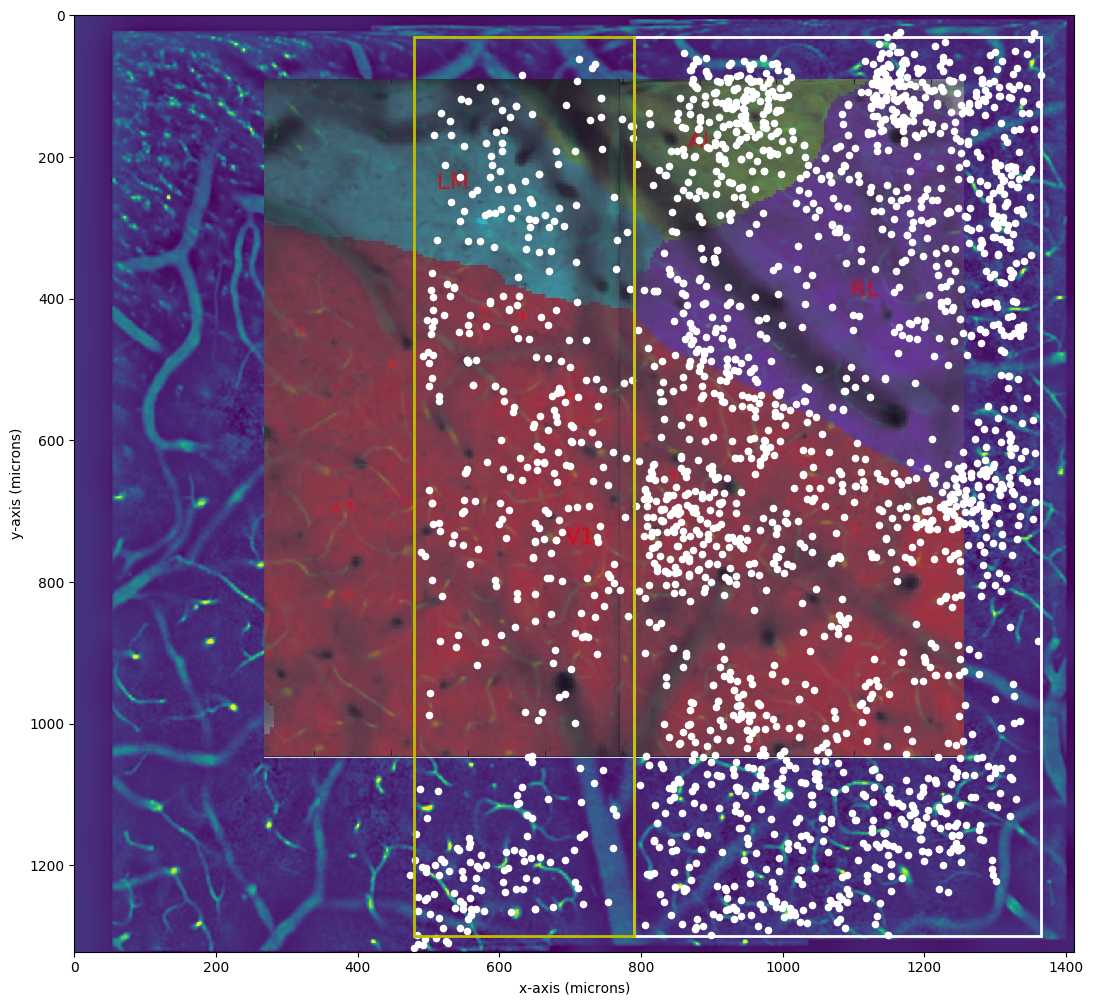

In [18]:
Minnie65 = Rectangle((790,30),575,1270,linewidth=2,edgecolor='w',facecolor='none')
Minnie35 = Rectangle((480,30),310,1270,linewidth=2,edgecolor='y',facecolor='none')

fig = plt.figure(figsize=(10,10), dpi=100)

ax = fig.add_axes((0,0,1,1),facecolor='w')
# ax.set_axis_off()
ax.imshow(stack_ch2[70,:,:])
ax.set_aspect('equal')
ax.set_axis_off()

ax1 = fig.add_axes((0.19,0.19,0.7,0.75))
ax1.imshow(im,alpha=0.80)
# ax.set_xlim(0,1412)
# ax.set_ylim(1322,0)
ax1.set_aspect('equal')
ax1.set_axis_off()

ax2 = fig.add_axes((0,0,1,1),facecolor='none')
ax2.scatter(*somata_landmarks_flipy.T[:2]*1000, c='w', s=20)
ax2.add_patch(Minnie65)
ax2.add_patch(Minnie35)



ax2.set_xlim(0,1412)
ax2.set_ylim(1322,0)
ax2.set_aspect('equal')
# ax2.set_axis_off()

ax2.set_ylabel('y-axis (microns)')
ax2.set_xlabel('x-axis (microns)')

plt.savefig('alignment_image.png')
